In [ ]:
#Extract Data
from zipfile import ZipFile
file_name="/content/drive/MyDrive/CV_2023_SC_Dataset.zip"
with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print("done")

done


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
TRAIN_DIR = r'/content/personA/Train'
TEST_DIR = r'/content/personA/Test'

In [ ]:
import numpy as np
import cv2
from random import shuffle
import matplotlib.pyplot as plt

In [ ]:
trainingData = []
testingData=[]
path = '/content/personA/Train'
for img in os.listdir(path):
    try:
      image = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
      imageLabel=0
      imageResized = cv2.resize(image,(80,80))
      trainingData.append([imageResized,imageLabel])
    except Exception as e: 
      pass
print(len(trainingData))
path = '/content/personB/Train'
for img in os.listdir(path):
    try:
      image = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
      imageLabel=1
      imageResized = cv2.resize(image,(80,80))
      trainingData.append([imageResized,imageLabel])
    except Exception as e: 
      pass
print(len(trainingData))
path = '/content/personC/Train'
for img in os.listdir(path):
    try:
      image = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
      imageLabel=2
      imageResized = cv2.resize(image,(80,80))
      trainingData.append([imageResized,imageLabel])
    except Exception as e: 
      pass
print(len(trainingData))
path = '/content/personD/Train'
for img in os.listdir(path):
    try:
      image = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
      imageLabel=3
      imageResized = cv2.resize(image,(80,80))
      trainingData.append([imageResized,imageLabel])
    except Exception as e: 
      pass
print(len(trainingData))
path = '/content/personE/Train'
for img in os.listdir(path):
    try:
      image = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
      imageLabel=4
      imageResized = cv2.resize(image,(80,80))
      trainingData.append([imageResized,imageLabel])
    except Exception as e: 
      pass
print(len(trainingData))
path='/content/personA/Test'
for img in os.listdir(path):
   try:
      image = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
      imageLabel=0
      imageResized = cv2.resize(image,(80,80))
      testingData.append([imageResized,imageLabel])
   except Exception as e: 
      pass
print(len(testingData))
path='/content/personB/Test'
for img in os.listdir(path):
   try:
      image = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
      imageLabel=1
      imageResized = cv2.resize(image,(80,80))
      testingData.append([imageResized,imageLabel])
   except Exception as e: 
      pass
print(len(testingData))
path='/content/personC/Test'
for img in os.listdir(path):
   try:
      image = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
      imageLabel=2
      imageResized = cv2.resize(image,(80,80))
      testingData.append([imageResized,imageLabel])
   except Exception as e: 
      pass
print(len(testingData))
path='/content/personD/Test'
for img in os.listdir(path):
   try:
      image = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
      imageLabel=3
      imageResized = cv2.resize(image,(80,80))
      testingData.append([imageResized,imageLabel])
   except Exception as e: 
      pass
print(len(testingData))
path='/content/personE/Test'
for img in os.listdir(path):
   try:
      image = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED)
      imageLabel=4
      imageResized = cv2.resize(image,(80,80))
      testingData.append([imageResized,imageLabel])
   except Exception as e: 
      pass
print(len(testingData))

40
80
120
160
200
8
16
24
32
40


In [ ]:
trainingData=np.array(trainingData)
testingData=np.array(testingData)

<ipython-input-6-78d374558278>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trainingData=np.array(trainingData)
<ipython-input-6-78d374558278>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  testingData=np.array(testingData)


In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
#########################Model1################################
X = []
Y = []
for features,labels in trainingData:
  X.append(features)
  Y.append(labels)
X = np.array(X)
Y = np.array(Y)
X = X/255
X_Test = []
Y_Test = []
for features,labels in testingData:
  X_Test.append(features)
  Y_Test.append(labels)
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)
X_Test = X_Test/255


In [ ]:
from sklearn.model_selection import train_test_split
X_Train,X_Valid,Y_Train,Y_Valid=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [ ]:
from keras.applications.vgg16 import VGG16 

In [ ]:
vgg=VGG16(input_shape=(80,80,3),weights='imagenet',include_top=False)
for layer in vgg.layers:
  layer.trainable=False

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(5,activation='softmax')(x)

In [ ]:
from keras.models import Model
model5=Model(inputs=vgg.input,outputs=prediction)
model5.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from datetime import datetime as dt
start = dt.now()
history=model5.fit(X_Train,Y_Train,validation_data=(X_Valid,Y_Valid),epochs=30)
running_secs = (dt.now() - start).seconds
print(running_secs)

Epoch 1/30
5/5 [==============================] - 9s 173ms/step - loss: 1.6344 - accuracy: 0.3750 - val_loss: 1.2903 - val_accuracy: 0.7250
Epoch 2/30
5/5 [==============================] - 0s 39ms/step - loss: 1.3100 - accuracy: 0.5312 - val_loss: 1.1188 - val_accuracy: 0.6750
Epoch 3/30
5/5 [==============================] - 0s 40ms/step - loss: 1.0585 - accuracy: 0.8062 - val_loss: 0.8263 - val_accuracy: 1.0000
Epoch 4/30
5/5 [==============================] - 0s 39ms/step - loss: 0.8277 - accuracy: 0.9187 - val_loss: 0.6742 - val_accuracy: 1.0000
Epoch 5/30
5/5 [==============================] - 0s 40ms/step - loss: 0.6846 - accuracy: 0.9438 - val_loss: 0.5477 - val_accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 0s 50ms/step - loss: 0.5572 - accuracy: 0.9937 - val_loss: 0.4572 - val_accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 0s 40ms/step - loss: 0.4730 - accuracy: 1.0000 - val_loss: 0.3972 - val_accuracy: 0.9750
Epoch 8/30
5/5 [==========

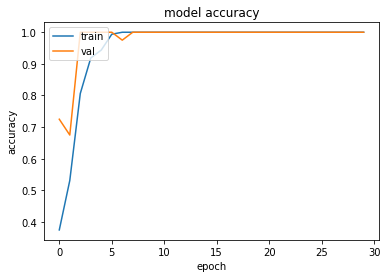

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from datetime import datetime as dt
start = dt.now()
model5.evaluate(X_Test,Y_Test)
running_secs2 = (dt.now() - start)
print(running_secs2)

2/2 [==============================] - 0s 15ms/step - loss: 0.1207 - accuracy: 1.0000
0:00:00.114097


In [ ]:
model5.save("ComputerVisionModel1.hdf5")

In [ ]:
!pip install scikit-plot==0.3.7
import scikitplot as skplt
Y_Pred=model5.predict(X_Test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2/2 [==============================] - 1s 36ms/step


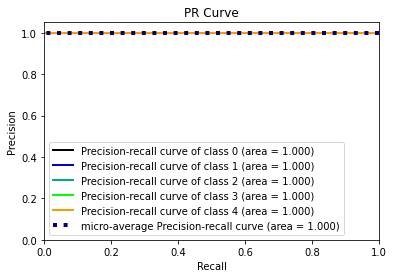

In [ ]:
skplt.metrics.plot_precision_recall(Y_Test, Y_Pred, title = 'PR Curve')

In [ ]:
import imutils
imageTest = cv2.imread("/content/personA/Test/personA_13.png",cv2.IMREAD_UNCHANGED)
displayImage = imutils.resize(imageTest,width=300)
imageResized = cv2.resize(imageTest,(80,80))
testingData = []
testingData.append([imageResized])
Xtest =[]
Xtest.append(testingData[0])
Xtest = np.array(Xtest)
Xtest=Xtest/255

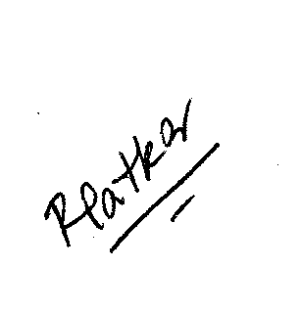

Person A


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(displayImage)
pre = model5.predict(Xtest[0],verbose=3)
if   np.argmax(pre) == 0:
    output ='Person A'
elif np.argmax(pre) == 1:
    output ='Person B'
elif  np.argmax(pre) == 2:
    output ='Person C'
elif np.argmax(pre) == 3:
    output ='Person D'
elif np.argmax(pre) == 4:
    output ='Person E'
print(output)

In [ ]:
imageTest = cv2.imread("/content/personD/Test/personD_SigVerificationTestLabels.csv",cv2.IMREAD_UNCHANGED)
displayImage = imutils.resize(imageTest,width=300)
imageResized = cv2.resize(imageTest,(80,80))
testingData = []
testingData.append([imageResized])
Xtest =[]
Xtest.append(testingData[0])
Xtest = np.array(Xtest)
Xtest=Xtest/255

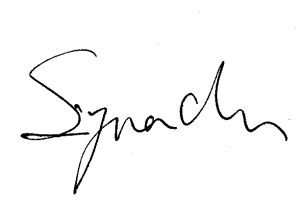

Person C


In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(displayImage)
pre = model5.predict(Xtest[0],verbose=3)
if   np.argmax(pre) == 0:
    output ='Person A'
elif np.argmax(pre) == 1:
    output ='Person B'
elif  np.argmax(pre) == 2:
    output ='Person C'
elif np.argmax(pre) == 3:
    output ='Person D'
elif np.argmax(pre) == 4:
    output ='Person E'
print(output)